In [24]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix






def get_recommendations(name):
    df = pd.read_csv('top10K-spotify.csv',index_col=0)
    df["type"].value_counts()
    df=df.drop(columns=["index","city_1","district_1","district_2","city_3","district_3" ])
    df = df[df['city_2'].notna()]
    df = df[df['country'].notna()]
    df.rename(columns = {'artist':'name'}, inplace = True)
    # print(data_df.head())

    df2=pd.read_csv('data_w_spotify.csv',index_col=None)
    df2=df2.drop(columns=["isdone","id"])
    df2['genres'] = df2['genres'].fillna('')

    df3=df.merge(df2,on='name')


    df3['genres']= df3['genres'].str.strip('[]').str.replace("'","").str.split('\s*,\s*')

    def create_soup(x):
        return ' '.join(x['genres']) + ' ' + ' '+ x['city_2'] + ' ' + x['country']+' ' + x['gender']+' ' + x['type']

    df3['soup'] = df3.apply(create_soup, axis=1)

    count = CountVectorizer()
    count_matrix = count.fit_transform(df3['soup'])
    print(df3.head())
    # print(count_matrix.shape)
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    dict_names = dict(zip(df3.name, df3.spotifyid))
    df3=df3.drop(columns=["spotifyid"])
    # Get the index of the movie that matches the title
    df3 = df3.reset_index()
    indices = pd.Series(df3.index, index=df3['name']).drop_duplicates()
    idx = indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    print(sim_scores)

    # Get the movie indices
    indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
     
    top_10=df3['name'].iloc[indices]
    spot_top10=[]
    for item in top_10:
        spot_top10.append(dict_names[str(item)])

    return top_10





In [26]:
get_recommendations('Kim Petras')

          name gender  age    type country    city_2               spotifyid  \
0        Drake   male   33  person      CA   Toronto  3TVXtAsR1Inumwj472S9r4   
1  Post Malone   male   25  person      US  Syracuse  246dkjvS1zLTtiykXe5h60   
2   Ed Sheeran   male   29  person      GB   Halifax  6eUKZXaKkcviH0Ku9w2n3V   
3     J Balvin   male   35  person      CO  Medellín  1vyhD5VmyZ7KMfW5gqLgo5   
4    Bad Bunny   male   26  person      PR  San Juan  4q3ewBCX7sLwd24euuV69X   

                                              genres  popularity   followers  \
0  [canadian hip hop, canadian pop, hip hop, rap,...        98.0  61377383.0   
1                        [dfw rap, melodic rap, rap]        91.0  36067567.0   
2                                      [pop, uk pop]        95.0  93327682.0   
3  [latin, reggaeton, reggaeton colombiano, trap ...        93.0  32773399.0   
4                    [latin, reggaeton, trap latino]       100.0  44516743.0   

                                      

1111      Hayley Kiyoko
105                Daya
16       Camila Cabello
45          Demi Lovato
182                P!nk
217          Noah Cyrus
239             Zendaya
384      Britney Spears
616     Vanessa Hudgens
860         Hilary Duff
Name: name, dtype: object

In [ ]:
# data_df['gender'] = data_df['gender'].astype('str') 
# X = data_df.drop(columns=['gender'])

# lb = LabelBinarizer()
# y=lb.fit_transform(data_df['gender'])
# print("Training Model...")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# model = DecisionTreeClassifier()

# model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
# print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")


Training Model...
Train MAE: 0.9777097902097902
Test MAE: 0.7447552447552448


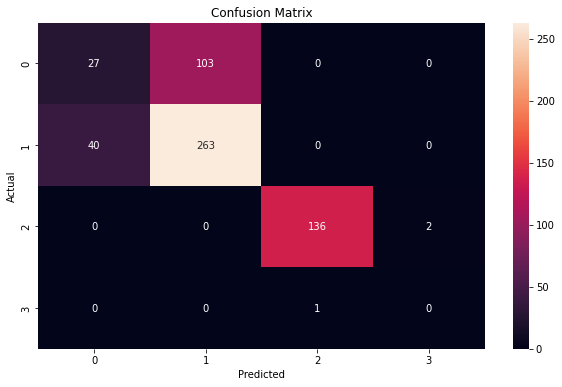

In [150]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=['artist',"index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['type','country','city_2'],drop_first=True)
# print(data_df.dtypes)

data_df['gender'] = data_df['gender'].astype('str') 
X = data_df.drop(columns=['gender'])

lb = LabelBinarizer()
y=lb.fit_transform(data_df['gender'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")

cm = confusion_matrix(y_test.argmax(axis=1),y_test_pred.argmax(axis=1) )
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [7]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,hamming_loss,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=["index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['gender','type','country','city_2'],drop_first=True)
# print(data_df.dtypes)

# data_df['gender'] = data_df['gender'].astype('str') 
X = data_df.drop(columns=['artist'])

lb = LabelBinarizer(sparse_output=True)
y=lb.fit_transform(data_df['artist'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y.todense(), test_size=0.35, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y.todense())
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")



Training Model...


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Train MAE: 0.884884346422808
Test MAE: 0.023976023976023976


In [12]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,hamming_loss,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=["artist","index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['gender','type','country'],drop_first=True)
# print(data_df.dtypes)

# data_df['gender'] = data_df['gender'].astype('str') 
X = data_df.drop(columns=['city_2'])

lb = LabelBinarizer(sparse_output=True)
y=lb.fit_transform(data_df['city_2'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y.todense(), test_size=0.30, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y.todense())
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 



Training Model...


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Train MAE: 0.5144855144855145
Test MAE: 0.13986013986013987


In [16]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

model3.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y.todense())
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

print(f"2Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"2Test MAE: {accuracy_score(y_test_pred, y_test)}")

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


2Train MAE: 0.5334665334665335
2Test MAE: 0.13986013986013987


In [105]:
# # For chapter 5
# from sklearn.linear_model import SGDClassifier
# import matplotlib.pyplot as plt
# import time

# # For chapter 6
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# clf = SGDClassifier(loss="log", penalty="l2")
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


ValueError: y should be a 1d array, got an array of shape (1716, 2812) instead.

Training Model...
Train MAE: 1.0
Test MAE: 0.9947552447552448


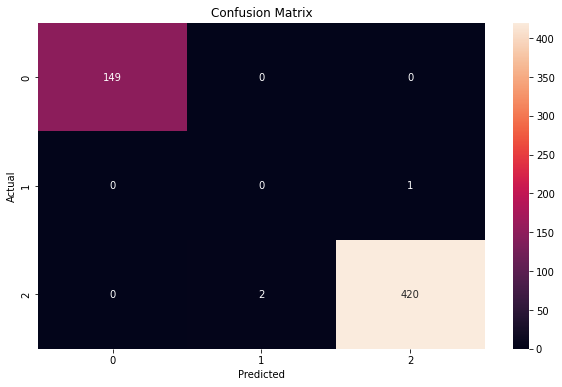

In [145]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=['artist',"index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['gender','country','city_2'],drop_first=True)
# print(data_df.dtypes)

data_df['type'] = data_df['type'].astype('str') 
X = data_df.drop(columns=['type'])

lb = LabelBinarizer()
y=lb.fit_transform(data_df['type'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")

cm = confusion_matrix(y_test.argmax(axis=1),y_test_pred.argmax(axis=1) )
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
df1=nodes.append(df, ignore_index=True)

MemoryError: Unable to allocate 1.20 GiB for an array with shape (3579, 45034) and data type float64